**Importazione Librerie**

In [52]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats
import scipy
import sklearn
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Dataset 9000+ Movies #

Il dataset 9000+ Movies contiene un campione di film ,ordinati per popolarita per Recommender Systems*


**Importiamo il dataset:**

In [2]:
mvs = pd.read_csv('mymoviedb.csv',lineterminator='\n')
film= pd.read_csv('mymoviedb.csv',lineterminator='\n')
film_aux= pd.read_csv('mymoviedb.csv',lineterminator='\n')


mvs.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


**Otteniamo Informazione sul numero di righe e di colonne**

In [3]:
mvs.shape

(9827, 9)

**Determiniamo Tramite l'uso della describe() quali features sono quantitative:**

In [4]:
mvs.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


*Quindi le **Features Quantitative** sono 3:*
1. Popularity
2. Vote_Count
3. Vote_Avarage

*Le **Features Qualitative** sono 6:*
1. Release_Date	
2. Title	
3. Overview		
4. Original_Language	
5. Genre	
6. Poster_Url


**Verifichiamo se nel DataSet ci sono colonne con dei dati mancanti:**

In [5]:
mvs.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

**Il DataSet non ha dati Mancanti**

Visualizziamo alcune delle features, per estrapolare interessanti informazioni. 
Per esempio:

1. Quale era la distribuzione dei film negli anni?
2. Quale e' il film con la Popolarità più alta e piu bassa? 
3. Quale e' il film con la Vote_Average più alta e piu bassa? 
4. Quale e' il film con la Vote_Count più alta e piu bassa? 
5. La distribuzione dei film divisa per genere?
6. Quale e' la popolarità dei film, divisa per genere?
7. Quale e' la valutazione media dei film, divisa per genere?
8. Quale e' la distribuzione dei film in base alla lingua?
9. L'Overview può influenzare la popolarità di un film?


# **Quale era la distribuzione dei film negli anni?**

Prima di tutto Modifichiamo il formato della data lasciando segnato solo l'anno per semplificarci la visione della distribuzione


In [6]:
release=mvs['Release_Date']
release=release.str.slice_replace(4, 10, '')
release.head()
release.describe()
film['Release_Date']=film['Release_Date'].str.slice_replace(4, 10, '')


*Fatto ciò visualizziamo la distribuzione dei film nei vari anni:*

2021    714
2018    530
2017    510
2019    500
2016    470
       ... 
1902      1
1920      1
2024      1
1929      1
1930      1
Name: Release_Date, Length: 102, dtype: int64


<AxesSubplot:>

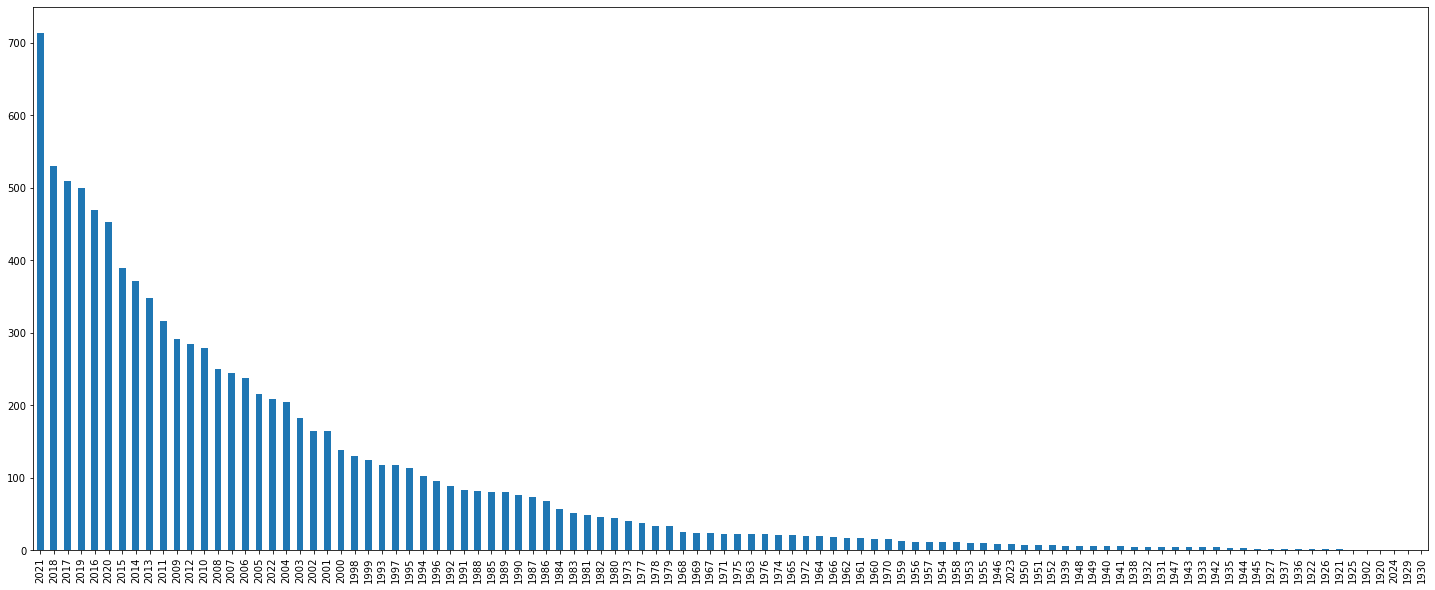

In [7]:
release=release.value_counts(normalize=False,sort=True)
print(release)
release.plot(kind = 'bar',figsize=(25,10))

**Come possiamo notare dal 1930 al 2021 c'è stato un aumento esponenziale della produzione di film**

# **Quale e' il film con la Popolarità più alta?**


In [8]:
mvs[mvs['Popularity'] == mvs['Popularity'].max()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...


**Spider-Man: No Way Home** è il film più popolare, ipotizzo anche sia quello con Vote Average Maggiore

**Verifichiamo qual è il film con vote Average Maggiore**:

In [9]:
mvs[mvs['Vote_Average'] == mvs['Vote_Average'].max()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
9391,2020-04-09,Kung Fu Master Huo Yuanjia,The young and vigorous Huo Yuanjia was only fo...,13.745,1,10.0,zh,"Action, Drama",https://image.tmdb.org/t/p/original/boXAHksMko...


come possiamo vedere non è cosi,**Kung Fu Master Huo Yuanjia** ha Vote Average Maggiore, **causa di un singolo voto**

**Spider-Man: No Way Home** in quanto film più popolare è il film più votato?

**Verifichiamo qual è il film con vote Count Maggiore**:

In [10]:
mvs[mvs['Vote_Count'] == mvs['Vote_Count'].max()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
380,2010-07-15,Inception,"Cobb, a skilled thief who commits corporate es...",127.131,31077,8.4,en,"Action, Science Fiction, Adventure",https://image.tmdb.org/t/p/original/edv5CZvWj0...


Non è cosi **Inception** è il film più votato

# **Quale e' il film con la Popolarità più bassa?**


In [11]:
mvs[mvs['Popularity'] == mvs['Popularity'].min()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
9826,1984-09-23,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,en,"War, Drama, Science Fiction",https://image.tmdb.org/t/p/original/lBhU4U9Eeh...


**The United States vs. Billie Holiday** e **Threads** sono i film meno popolari, Sono anche i meno votati? sono quelli con la valutazione media minore?

**Verifichiamo qual è il film con vote Average Minore**:

In [12]:
mvs[mvs['Vote_Average'] == mvs['Vote_Average'].min()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
80,2022-03-30,Sonic the Hedgehog 2,"After settling in Green Hills, Sonic is eager ...",317.159,0,0.0,en,"Action, Science Fiction, Comedy, Family",https://image.tmdb.org/t/p/original/6DrHO1jr3q...
210,2023-04-06,Fast & Furious 10,The tenth installment in the Fast Saga.,181.216,0,0.0,en,"Action, Crime",https://image.tmdb.org/t/p/original/2DyEk84Xnb...
231,2022-04-22,Dragon Ball Super: Super Hero,"The Red Ribbon Army, an evil organization that...",170.551,0,0.0,ja,"Animation, Science Fiction, Action",https://image.tmdb.org/t/p/original/wFYXVMKWLA...
232,2022-08-25,After Ever Happy,The fourth installment in The After Universe. ...,169.964,0,0.0,en,Romance,https://image.tmdb.org/t/p/original/vWLyXOFm1C...
314,2022-03-17,The Bad Guys,When the infamous Bad Guys are finally caught ...,146.548,0,0.0,en,"Animation, Comedy, Action, Family, Crime",https://image.tmdb.org/t/p/original/qT2LvVFPB8...
...,...,...,...,...,...,...,...,...,...
9067,2016-06-25,Five Nights at Freddy's: The Fan Film,A young man named Mike Schmidt loses his broth...,14.082,0,0.0,en,"Action, Horror, Mystery",https://image.tmdb.org/t/p/original/aeRw2tjhLp...
9134,2023-05-24,The Little Mermaid,A young mermaid makes a deal with a sea witch:...,14.016,0,0.0,en,"Adventure, Family, Fantasy, Romance",https://image.tmdb.org/t/p/original/57bEiV6qwc...
9145,2022-03-11,The Kashmir Files,The obscure saga and imprints of the painful e...,14.008,0,0.0,hi,"Thriller, History",https://image.tmdb.org/t/p/original/iXFgqLQEsp...
9177,2022-03-11,I Love America,A single woman who decides to take a chance on...,13.978,0,0.0,fr,"Comedy, Romance",https://image.tmdb.org/t/p/original/sZCrb8e9AG...


**Verifichiamo qual è il film con vote Count Minore**:

In [13]:
mvs[mvs['Vote_Count'] == mvs['Vote_Count'].min()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
80,2022-03-30,Sonic the Hedgehog 2,"After settling in Green Hills, Sonic is eager ...",317.159,0,0.0,en,"Action, Science Fiction, Comedy, Family",https://image.tmdb.org/t/p/original/6DrHO1jr3q...
210,2023-04-06,Fast & Furious 10,The tenth installment in the Fast Saga.,181.216,0,0.0,en,"Action, Crime",https://image.tmdb.org/t/p/original/2DyEk84Xnb...
231,2022-04-22,Dragon Ball Super: Super Hero,"The Red Ribbon Army, an evil organization that...",170.551,0,0.0,ja,"Animation, Science Fiction, Action",https://image.tmdb.org/t/p/original/wFYXVMKWLA...
232,2022-08-25,After Ever Happy,The fourth installment in The After Universe. ...,169.964,0,0.0,en,Romance,https://image.tmdb.org/t/p/original/vWLyXOFm1C...
314,2022-03-17,The Bad Guys,When the infamous Bad Guys are finally caught ...,146.548,0,0.0,en,"Animation, Comedy, Action, Family, Crime",https://image.tmdb.org/t/p/original/qT2LvVFPB8...
...,...,...,...,...,...,...,...,...,...
9067,2016-06-25,Five Nights at Freddy's: The Fan Film,A young man named Mike Schmidt loses his broth...,14.082,0,0.0,en,"Action, Horror, Mystery",https://image.tmdb.org/t/p/original/aeRw2tjhLp...
9134,2023-05-24,The Little Mermaid,A young mermaid makes a deal with a sea witch:...,14.016,0,0.0,en,"Adventure, Family, Fantasy, Romance",https://image.tmdb.org/t/p/original/57bEiV6qwc...
9145,2022-03-11,The Kashmir Files,The obscure saga and imprints of the painful e...,14.008,0,0.0,hi,"Thriller, History",https://image.tmdb.org/t/p/original/iXFgqLQEsp...
9177,2022-03-11,I Love America,A single woman who decides to take a chance on...,13.978,0,0.0,fr,"Comedy, Romance",https://image.tmdb.org/t/p/original/sZCrb8e9AG...


Come possiamo vedere non è cosi i film con valutazione media minore e vote count minore sono gli stessi e sono diversi da **The United States vs. Billie Holiday e Threads**.

Immagino siano i film non ancora usciti

**Visualizziamo i Film con valutazione media e vote count minore pero già usciti**

**Eliminiamo dal dataset i film non ancora usciti:**

In [14]:
mvs['Release_Date']=mvs['Release_Date'].str.slice_replace(4, 10, '')
mvs[(mvs['Vote_Average'] == mvs['Vote_Average'].min()) & (mvs['Release_Date'].astype(int)<datetime.datetime.now().year)]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
4853,2018,Nice Sister-In-Law 3,Jung-tae has become a successful businessman. ...,21.352,0,0.0,ko,Romance,https://image.tmdb.org/t/p/original/nW3ZaX4dOk...
5712,1999,Ms. Kristina Moran: Ang Babaeng Palaban,"Kristina ""Tina"" Moran is a nightclub star perf...",19.126,0,0.0,tl,"Comedy, Romance",https://image.tmdb.org/t/p/original/aRNRsXo99n...
6622,2021,Cam Girls,"Jenna, Kelly and Ness have all found themselve...",17.313,0,0.0,en,Romance,https://image.tmdb.org/t/p/original/9BolmRFhKY...
6831,2020,"Jakarta, City of Dreamers","About young boy DOM 23th , is trying everythin...",16.951,0,0.0,id,Drama,https://image.tmdb.org/t/p/original/5CTlRaNvWE...
6939,2021,Deadpool and Korg React,Two members of the MCYouTube react to the upco...,16.806,0,0.0,en,Comedy,https://image.tmdb.org/t/p/original/qUzVrmvMyk...
7437,2018,Purpose of Reunion 3,"Sung-hyeon reunites with first love, Jin-hye a...",16.035,0,0.0,ko,"Drama, Romance",https://image.tmdb.org/t/p/original/7o3FIea430...
8188,1992,Sex and Curse,"Women keep throwing themselves at Charlie, but...",14.998,0,0.0,cn,"Drama, Horror",https://image.tmdb.org/t/p/original/d7VBt6QUCA...
8672,2019,I Don't Like Younger Men 4,"Thanks to her wealthy father, Yoo-jin runs a c...",14.449,0,0.0,ko,Romance,https://image.tmdb.org/t/p/original/hA18oqd7vH...
9067,2016,Five Nights at Freddy's: The Fan Film,A young man named Mike Schmidt loses his broth...,14.082,0,0.0,en,"Action, Horror, Mystery",https://image.tmdb.org/t/p/original/aeRw2tjhLp...


In [15]:
mvs[(mvs['Vote_Count'] == mvs['Vote_Count'].min()) & (mvs['Release_Date'].astype(int)<datetime.datetime.now().year)]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
4853,2018,Nice Sister-In-Law 3,Jung-tae has become a successful businessman. ...,21.352,0,0.0,ko,Romance,https://image.tmdb.org/t/p/original/nW3ZaX4dOk...
5712,1999,Ms. Kristina Moran: Ang Babaeng Palaban,"Kristina ""Tina"" Moran is a nightclub star perf...",19.126,0,0.0,tl,"Comedy, Romance",https://image.tmdb.org/t/p/original/aRNRsXo99n...
6622,2021,Cam Girls,"Jenna, Kelly and Ness have all found themselve...",17.313,0,0.0,en,Romance,https://image.tmdb.org/t/p/original/9BolmRFhKY...
6831,2020,"Jakarta, City of Dreamers","About young boy DOM 23th , is trying everythin...",16.951,0,0.0,id,Drama,https://image.tmdb.org/t/p/original/5CTlRaNvWE...
6939,2021,Deadpool and Korg React,Two members of the MCYouTube react to the upco...,16.806,0,0.0,en,Comedy,https://image.tmdb.org/t/p/original/qUzVrmvMyk...
7437,2018,Purpose of Reunion 3,"Sung-hyeon reunites with first love, Jin-hye a...",16.035,0,0.0,ko,"Drama, Romance",https://image.tmdb.org/t/p/original/7o3FIea430...
8188,1992,Sex and Curse,"Women keep throwing themselves at Charlie, but...",14.998,0,0.0,cn,"Drama, Horror",https://image.tmdb.org/t/p/original/d7VBt6QUCA...
8672,2019,I Don't Like Younger Men 4,"Thanks to her wealthy father, Yoo-jin runs a c...",14.449,0,0.0,ko,Romance,https://image.tmdb.org/t/p/original/hA18oqd7vH...
9067,2016,Five Nights at Freddy's: The Fan Film,A young man named Mike Schmidt loses his broth...,14.082,0,0.0,en,"Action, Horror, Mystery",https://image.tmdb.org/t/p/original/aeRw2tjhLp...


Il dataset viene filtrato con successo pero non ci da informazioni sensibili quindi ,

**Filtriamo il dataset per eliminare i film con un Vote_Count < 10**

In [16]:
#Casto data
film_aux['Release_Date']=film_aux['Release_Date'].str.slice_replace(4, 10, '')

film_aux.drop(film_aux.index[ (film_aux["Vote_Count"]  < 10)],axis=0,inplace=True)
film_aux[(film_aux['Vote_Count'] == film_aux['Vote_Count'].min()) & (film_aux['Release_Date'].astype(int)<datetime.datetime.now().year)]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
1238,2019,Cencoroll Connect,Student Yuki has never seen one of the giant m...,57.183,10,7.1,ja,"Animation, Science Fiction",https://image.tmdb.org/t/p/original/2ayrhipQ6w...
1686,2021,Sword Art Online the Movie -Progressive- Aria ...,One month after Kayaba Akihiko's game of death...,46.145,10,8.1,ja,"Animation, Action, Fantasy, Science Fiction",https://image.tmdb.org/t/p/original/yD9RhgIVyd...
1871,2010,The Legend of Siren XXX,"In a rural port town, Kenji Ishikawa runs a ba...",42.685,10,4.2,ja,Horror,https://image.tmdb.org/t/p/original/nYgWoSt2Mb...
2275,2005,Semen Demon,"Sexual bombshell Reiko Yamaguchi, star of the ...",37.032,10,6.3,en,"Horror, Fantasy",https://image.tmdb.org/t/p/original/dAcHEXZiF5...
2311,2016,Garo: Divine Flame,"Leon, who has succeeded the name of Golden Kni...",36.614,10,5.3,ja,"Action, Animation",https://image.tmdb.org/t/p/original/74xMMFGE2e...
3063,2017,Boruto: Jump Festa Special,Team Konohamaru is given a mission to track do...,29.651,10,5.7,ja,Animation,https://image.tmdb.org/t/p/original/9AOtmiqHCH...
3462,2021,A Christmas Together With You,"During the Christmas season, Megan and her fat...",27.158,10,5.8,en,"TV Movie, Romance, Drama",https://image.tmdb.org/t/p/original/bDlKgyTZtd...
3467,2021,A Choice of Weapons: Inspired by Gordon Parks,This documentary chronicles renaissance man Go...,27.149,10,6.6,en,Documentary,https://image.tmdb.org/t/p/original/p50NI5jH3D...
3477,2013,Young Mother,"In the period of ninteen-year-old lust, repeat...",27.109,10,5.5,ko,"Comedy, Romance",https://image.tmdb.org/t/p/original/x73C5Hi8Fu...
4308,1969,Graf Porno und seine Mädchen,A comedy directed by Günter Hendel.,23.239,10,6.6,de,Comedy,https://image.tmdb.org/t/p/original/98bbEkdh9C...


**Filtriamo il dataset per eliminare i film con i voti medi minori uguali a 0**

In [17]:

film_aux.drop(film_aux.index[ (film_aux["Vote_Average"]  ==0)],axis=0,inplace=True)
film_aux[(film_aux['Vote_Average'] == film_aux['Vote_Average'].min()) & (film_aux['Release_Date'].astype(int)<datetime.datetime.now().year)]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
8183,2012,Foodfight!,The evil Brand X joins a supermarket that beco...,15.002,95,1.8,en,"Animation, Action, Comedy, Family",https://image.tmdb.org/t/p/original/to9ggXVyhN...


# **La distribuzione dei film divisa per genere?** 


Prima di tutto Modifichiamo il nostro DataSet per avere un solo genere per riga.

In [18]:
mvs['Genre']= mvs['Genre'].str.split(', ')
mvs= mvs.explode('Genre').reset_index(drop=True)
mvs.describe()

,Popularity,Vote_Count,Vote_Average
count,25793.000000,25793.000000,25793.000000
mean,42.001288,1504.824526,6.475749
std,113.341050,2743.009590,1.091296
min,13.354000,0.000000,0.000000
25%,16.366000,166.000000,6.000000
50%,21.865000,490.000000,6.600000
75%,36.503000,1501.000000,7.200000
max,5083.954000,31077.000000,10.000000


**Calcolo della Distribuzione:**

<AxesSubplot:>

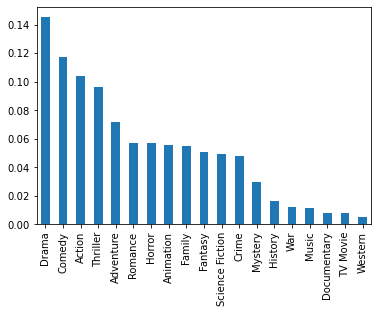

In [19]:
genere=mvs['Genre'].value_counts(normalize=True,sort=True)
genere.plot(kind = 'bar')

*Dal calcolo della distribuzione possiamo vedere che rispetto agli altri generi, i film contenenti il genere **Drama** sono di più.
Si puo ipotizzare che il genere Drama essendo quello più presente, sia anche il più piaciuto, andiamo a verificare:*

# **Quale e' la popolarità dei film, divisa per genere?**



  Utilizzo un grafico a barre per visualizzare la relazione tra **popolarità e genere**

<AxesSubplot:xlabel='Genre'>

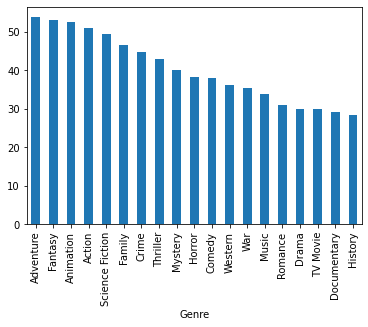

In [20]:
mvs.groupby('Genre').Popularity.mean().sort_values(ascending=False).plot(kind='bar')

Come Possiamo vedere il genere di Film più popolare è **Adventure** e non Drama come pensavo.


**Verifichiamo se i dati visualizzati sono corretti tramite il t-test**

In questo t-test stiamo verificando la seguente **ipotesi nulla**:
- La popolarità del genere **Adventure** è uguale alla popolarità dei restanti generi

**Ipotesi alternativa**:
- La popolarità del genere **Adventure** è diversa alla popolarità dei restanti generi


In [21]:
t_statistic, p_value = stats.ttest_1samp(a=mvs['Popularity'][mvs['Genre']=='Adventure'], popmean=mvs['Popularity'][mvs['Genre']!='Adventure'].mean(),alternative='two-sided')
print(t_statistic)
print(p_value)

3.5165113899295877
0.00044778835685399944


 **Il p-value e' minore della significatività, rigetto l'ipotesi nulla**, a favore di quella alternativa.
 Infatti da quanto segue dal grafico la popolarità di Adventure è diversa dalle altre

**Testiamo le restanti ipotesi alternative**:
- La popolarità del genere **Adventure** è Maggiore alla popolarità dei restanti generi

**Ipotesi nulla**:
- La popolarità del genere **Adventure** è minore o uguale alla popolarità dei restanti generi


In [22]:
t_statistic, p_value = stats.ttest_1samp(a=mvs['Popularity'][mvs['Genre']=='Adventure'], popmean=mvs['Popularity'][mvs['Genre']!='Adventure'].mean(),alternative='greater')
print(t_statistic)
print(p_value)

3.5165113899295877
0.00022389417842699972


 **Il p-value e' minore della significatività, rigetto l'ipotesi nulla**, a favore di quella alternativa.


# Quale e' la valutazione media dei film, divisa per genere?

Ci immaginiamo che i film di genere **Adventure e  Fantasy** siano quelli con la valutazione media maggiore in quanto più popolari. 
Verifichiamo questa Tesi:

<AxesSubplot:xlabel='Genre'>

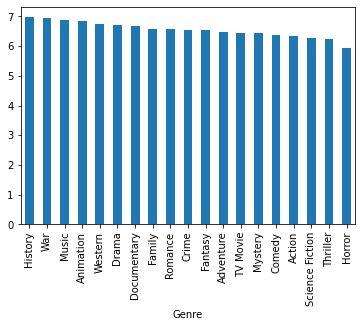

In [23]:
mvs.groupby('Genre').Vote_Average.mean().sort_values(ascending=False).plot(kind='bar')

Al contrario di ciò che potevamo pensare i film con la valutazione media più alta sono i film di genere **History**

**Verifichiamo se i dati visualizzati sono corretti tramite il t-test**

In questo t-test stiamo verificando la seguente **ipotesi nulla**:
- La Valutazione media del genere **History** è uguale alla popolarità dei restanti generi

**Ipotesi alternativa**:
- La Valutazione media del genere **History** è diversa alla popolarità dei restanti generi

In [24]:
t_statistic, p_value = stats.ttest_1samp(a=mvs['Vote_Average'][mvs['Genre']=='History'], popmean=mvs['Vote_Average'][mvs['Genre']!='History'].mean(),alternative='two-sided')
print(t_statistic)
print(p_value)

13.480309167256372
9.602184902691854e-35


 **Il p-value e' minore della significatività, rigetto l'ipotesi nulla**, a favore di quella alternativa.
 Infatti da quanto segue dal grafico si vede bene che la valutazione media di History è diversa delle altre 

**Testiamo le restanti ipotesi alternative**:
- La Valutazione media del genere **History** è Maggiore della valutazione media dei restanti generi

**Ipotesi nulla**:
- La Valutazione media del genere **History** è minore o uguale della valutazione media dei restanti generi


In [25]:
t_statistic, p_value = stats.ttest_1samp(a=mvs['Vote_Average'][mvs['Genre']=='History'], popmean=mvs['Vote_Average'][mvs['Genre']!='History'].mean(),alternative='greater')
print(t_statistic)
print(p_value)

13.480309167256372
4.801092451345927e-35


 **Il p-value e' minore della significatività, rigetto l'ipotesi nulla**, a favore di quella alternativa.
 Infatti da quanto segue dal grafico si vede bene che la valutazione media di History è maggiore delle altre 

Ora ci chiediamo, c'e' qualche correlazione tra qualcuna delle features riportate dal dataset? 
Verifichiamolo, calcolando l'**indice di correlazione di Pearson** tra le varie features a disposizione. 

In [26]:
mvs.corr(method='pearson')

,Popularity,Vote_Count,Vote_Average
Popularity,1.000000,0.146358,0.068284
Vote_Count,0.146358,1.000000,0.248307
Vote_Average,0.068284,0.248307,1.000000


Come Possiamo vedere tra le Features la correlazione è bassissima

# **Quale e' la distribuzione dei film in base alla lingua?**


en    0.776141
ja    0.078510
fr    0.026829
hi    0.002365
es    0.025550
ru    0.008878
de    0.007677
th    0.001745
ko    0.016283
tr    0.001047
cn    0.011592
zh    0.014112
it    0.009731
pt    0.002791
ml    0.000116
pl    0.001434
fi    0.000465
no    0.002404
da    0.002443
id    0.001357
sv    0.002249
nl    0.001783
te    0.000582
sr    0.000504
is    0.000233
ro    0.000155
tl    0.000504
fa    0.000233
uk    0.000271
nb    0.000078
eu    0.000116
lv    0.000039
ar    0.000155
el    0.000349
cs    0.000310
ms    0.000078
bn    0.000078
ca    0.000039
la    0.000039
ta    0.000194
hu    0.000310
he    0.000155
et    0.000078
Name: Original_Language, dtype: float64


<AxesSubplot:>

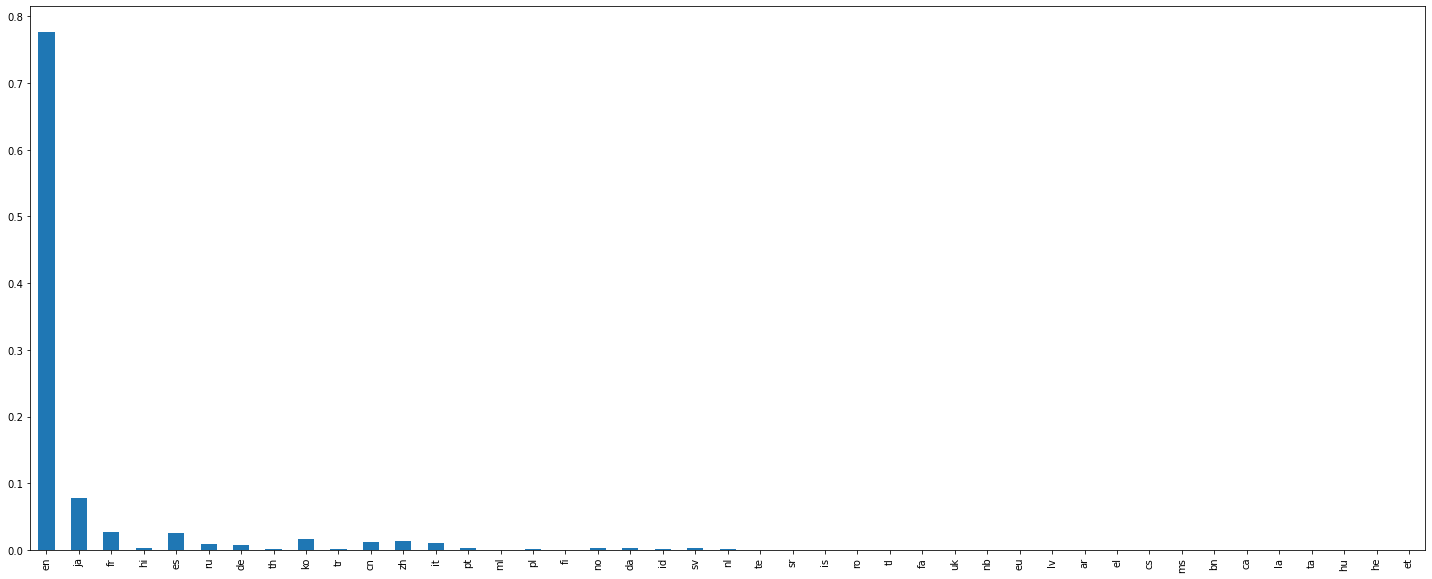

In [27]:
lang=mvs['Original_Language']
lang=lang.value_counts(normalize=True,sort=False)
print(lang)
lang.plot(kind = 'bar',figsize=(25,10))


Piu del 77% dei film è in lingua inglese, **ipotizzo** che i film più popolari , con la valutazione media maggiore  e con Vote_Cout maggiore siano in lingua inglese

verifico tali ipotesi:

<AxesSubplot:xlabel='Original_Language'>

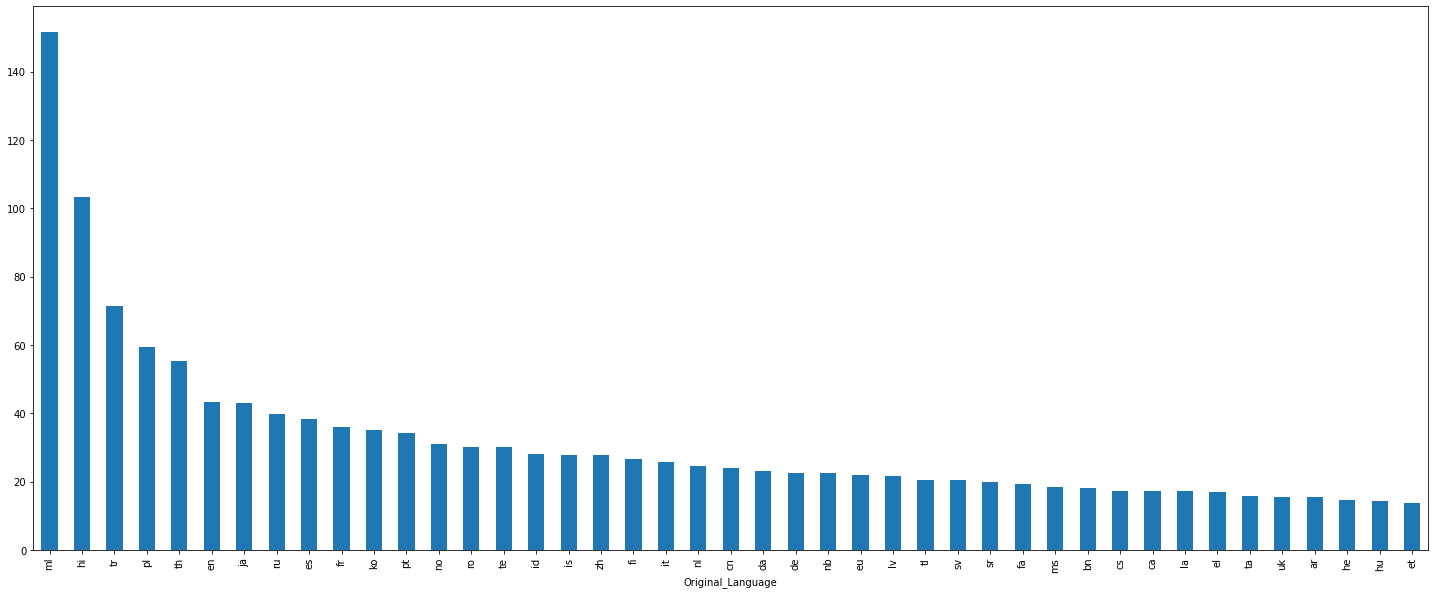

In [28]:
plt.figure(figsize=(25,10))
mvs.groupby('Original_Language').Popularity.mean().sort_values(ascending=False).plot(kind='bar')

Come possiamo vedere i film piu' popolari non sono quelli in lingua inglese bensì quelli in lingua **malayalam(ML)**

<AxesSubplot:xlabel='Original_Language'>

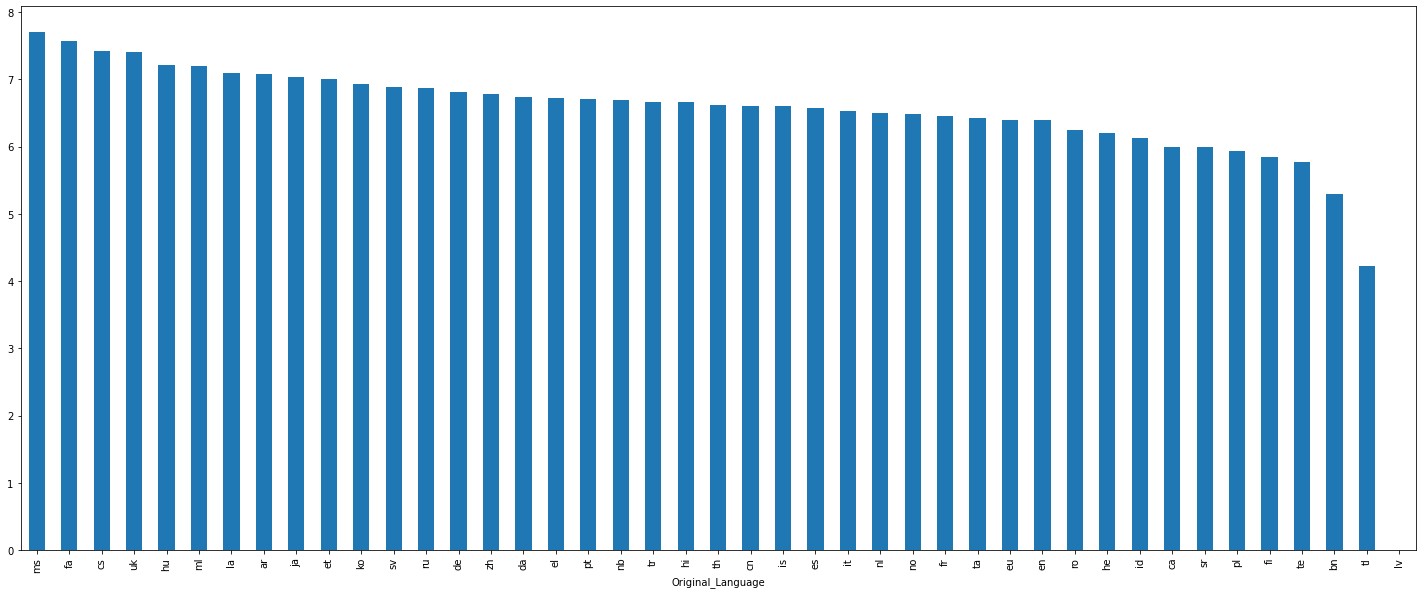

In [29]:
plt.figure(figsize=(25,10))
mvs.groupby('Original_Language').Vote_Average.mean().sort_values(ascending=False).plot(kind='bar')

Come possiamo vedere i film con valutazione media piu' alta non sono quelli in lingua inglese bensì quelli in lingua **Malese(MS)**

<AxesSubplot:xlabel='Original_Language'>

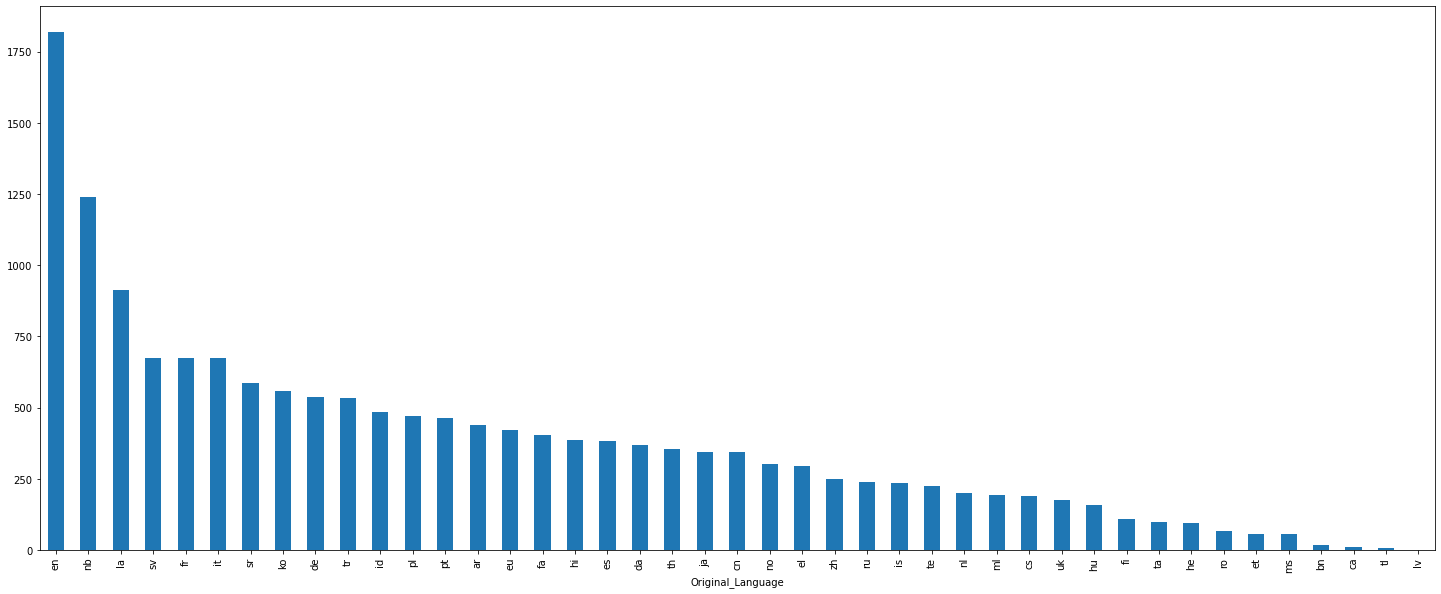

In [30]:
plt.figure(figsize=(25,10))
mvs.groupby('Original_Language').Vote_Count.mean().sort_values(ascending=False).plot(kind='bar')

**I film piu votati sono i film in Lingua Inglese**

# **L'overwiew può influenzare la Popolarità di un film?**

In [31]:
film_best_worst = film

In [32]:
# creiamo adesso un dataset per il problema di classificazione binaria in cui vogliamo provare a 
# capire se una persona ha assegnato 1 o 5 stelle sulla base della recensione
X = film_best_worst.Overview
y = film_best_worst.Popularity > film['Popularity'].mean()

print(X.shape)
print(y.shape)

(9827,)
(9827,)


In [33]:
print(y[y==True].count())

2026


In [34]:
# contiamo il numero di parole nei testi, eliminando le stop_words come a, an, the, ...
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [35]:
# trasformiamo il testo in formato Document Term Matrix
X_dtm = vect.fit_transform(X)
print(X_dtm.shape)

(9827, 28483)


In [36]:
import sklearn.model_selection as ms
# estraiamo a caso i dati per organizzarli in un insieme di training e validazione
X_train, X_test, y_train, y_test = ms.train_test_split(X_dtm, y, random_state=100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7370, 28483)
(7370,)
(2457, 28483)
(2457,)


In [37]:
# proviamo a vedere che cosa succede applicando la regressione logistica
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Alleniamo il modello di Regressione Logistica sui nostri dati
Model = lr.fit(X_train, y_train)

In [38]:
# Valutiamo il modello ottenuto sui dati di validazione
lr.score(X_test, y_test)

0.7627187627187627

**Lo score equivale a 0.76** ciò significa che **l'overview è abbastanza correlata alla popolarità** ciò significa che l'overview può influenzare la popolarità


# Regressione Lineare

In [39]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


**Converto Release_Date da Object a Int**

In [40]:
film["Release_Date"] = pd.to_numeric(film["Release_Date"])
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int64  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 691.1+ KB


 **Usiamo una tecnica di visualizzazione opportuna per verificare se esiste una qualche relazione tra Realease_Date e le altre features Quantitative.**

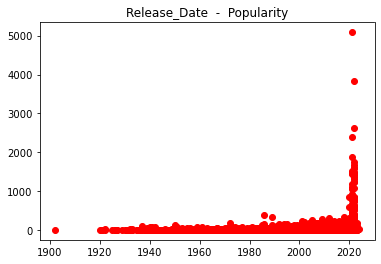

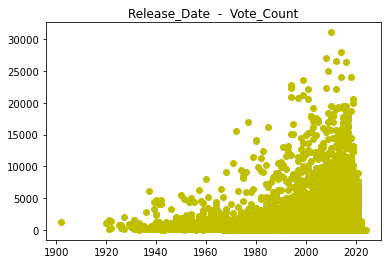

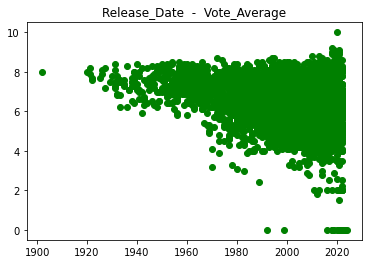

In [41]:
plt.figure()
plt.scatter(film['Release_Date'], film['Popularity'],color='r')
plt.title("Release_Date  -  Popularity")
plt.figure()
plt.scatter(film['Release_Date'], film['Vote_Count'],color='y')
plt.title("Release_Date  -  Vote_Count")
plt.figure()
plt.scatter(film['Release_Date'], film['Vote_Average'],color='g')
plt.title("Release_Date  -  Vote_Average")

plt.show()

In [42]:
film.corr(method='pearson')

,Release_Date,Popularity,Vote_Count,Vote_Average
Release_Date,1.000000,0.125877,-0.000377,-0.175039
Popularity,0.125877,1.000000,0.137400,0.053844
Vote_Count,-0.000377,0.137400,1.000000,0.253574
Vote_Average,-0.175039,0.053844,0.253574,1.000000


**Proviamo a filtrare i film non ancora usciti, i film con 0 vote_Count per vedere se modificano la correlazione**

In [43]:
film.drop(film.index[ (film["Release_Date"] > datetime.datetime.now().year)],axis=0,inplace=True)
film.drop(film.index[ (film["Vote_Count"] == 0)],axis=0,inplace=True)
film.drop(film.index[ (film["Vote_Average"] == 0)],axis=0,inplace=True)

In [44]:
film.corr(method='pearson')

,Release_Date,Popularity,Vote_Count,Vote_Average
Release_Date,1.000000,0.126750,0.004955,-0.145847
Popularity,0.126750,1.000000,0.137610,0.064504
Vote_Count,0.004955,0.137610,1.000000,0.272823
Vote_Average,-0.145847,0.064504,0.272823,1.000000


**Esiste una leggerissima correlazione tra Release_Date e Popularity**

Ora implementiamo e alleniamo un modello di regressione lineare

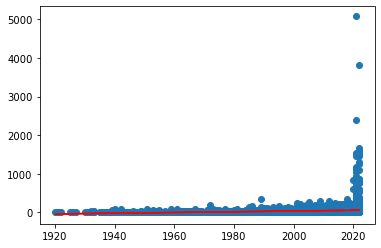

In [49]:
features = ['Release_Date']
X = film[features]
y = film['Popularity']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)
reg = LinearRegression().fit(X_train, y_train)

plt.scatter(X_train, y_train)
plt.plot(X_train, reg.coef_*X_train+reg.intercept_, color='r')

Adesso possiamo usare il modello imparato, per effettuare predizioni sul validation set. E' sufficiente usare la funzione predict sull'oggetto restituito da fit, passando come argomento x_valid

In [50]:
y_pred = reg.predict(X_valid)

In [53]:
print ('MAE:', metrics.mean_absolute_error(y_valid, y_pred))
print ('MSE:', metrics.mean_squared_error(y_valid, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

MAE: 30.399829085514494
MSE: 8759.451594184558
RMSE: 93.5919419297653


Determiniamo il **modello nullo** per vedere se abbiamo ottenuto un buon risultato

In [54]:
#calcolo popolarità media
mean_Popularity = film['Popularity'].mean()

# creao la nuova x con lo stesso numero di campioni del dataset originale, e con tutti i valori uguali al valore medio della Popolarità appena calcolato
null_model_y = [mean_Popularity] * X_valid.shape[0]

# valuto il modello nullo
print ('MAE:', metrics.mean_absolute_error(y_valid, y_pred))
print ('MSE:', metrics.mean_squared_error(y_valid, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

MAE: 30.399829085514494
MSE: 8759.451594184558
RMSE: 93.5919419297653


**I risultati del modello nullo sono uguali a quello di regressione lineare**

Quanto più basso è il valore MAE, tanto migliore è l'affidabilità del modello di regressione.

**Non abbiamo un modello di regressione affidabile**